In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('derived_data\\train_data_merged_2016.csv')
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [3]:
df.shape

(90275, 60)

# Checking the Transaction Date Range

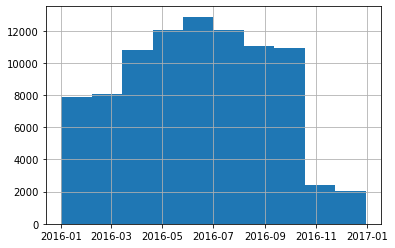

In [4]:
pd.to_datetime(df.transactiondate).hist()

In [5]:
pd.to_datetime(df.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [6]:
pd.to_datetime(df.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

# Checking for Duplicate Parcels

In [7]:
df.parcelid.nunique() == len(df)

False

## grouping same parcel Id 

In [8]:
count_per_parcel = df.groupby("parcelid").size()
more_than_one_sale = df[df.parcelid.isin(count_per_parcel[count_per_parcel>1].index)]
only_one_sale = df[df.parcelid.isin(count_per_parcel[count_per_parcel == 1].index)]
print(more_than_one_sale.parcelid.nunique())
more_than_one_sale.head()

124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13


In [2]:
#first ensure we've accurately separated the records
assert len(df) == (len(more_than_one_sale) + len(only_one_sale))

#then remove the duplicae records by choosing a random sale from properties with more than one
reduced_df = more_than_one_sale.sample(frac=1, random_state=0).groupby('parcelid').head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

NameError: name 'df' is not defined

In [11]:
#and check if the same parcel IDs exist in the original data as the reduced data
assert set(reduced_df.parcelid) == set(df.parcelid)

In [12]:
#using filter_duplicate_parcels in helpers.py
import sys
sys.path.insert(0, './Modules')
from helpers import filter_duplicate_parcels
import inspect
print(inspect.getsource(filter_duplicate_parcels))

def filter_duplicate_parcels(df, random_state=0):
    """filter the merged train and properties datasets to only include one record per parcel.
    
    Intended only for use on the training data for building the model

    Keyword arguments:
    df -- the result of `merge_dataset`
    random_state -- the random seed to be passed to the `pandas.DataFrame.sample()` method
    
    Returns:
    a pandas dataframe
    """
 
    counts_per_parcel = df.groupby('parcelid').size()
    more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
    only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]
    reduced_df = more_than_one_sale.sample(frac=1, random_state=random_state).groupby('parcelid').head(1)
    reduced_df = pd.concat([only_one_sale, reduced_df])
    
    return reduced_df



# Explore Null Values

In [19]:
reduced_df.isnull().sum().sort_values(ascending=False).head(20)

buildingclasstypeid         90134
finishedsquarefeet13        90117
basementsqft                90107
storytypeid                 90107
yardbuildingsqft26          90055
fireplaceflag               89930
architecturalstyletypeid    89890
typeconstructiontypeid      89852
finishedsquarefeet6         89731
decktypeid                  89492
poolsizesum                 89184
pooltypeid10                88991
pooltypeid2                 88946
taxdelinquencyyear          88375
taxdelinquencyflag          88375
hashottuborspa              87787
yardbuildingsqft17          87505
finishedsquarefeet15        86595
finishedsquarefeet50        83300
finishedfloor1squarefeet    83300
dtype: int64

In [20]:
reduced_df.isnull().sum().sort_values(ascending=True).head(20)

parcelid                        0
longitude                       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
roomcnt                         0
latitude                        0
fips                            0
bathroomcnt                     0
assessmentyear                  0
transactiondate                 0
logerror                        0
bedroomcnt                      0
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
propertycountylandusecode       1
taxamount                       6
regionidzip                    35
structuretaxvaluedollarcnt    378
censustractandblock           603
dtype: int64

# Explore Unique Values

In [26]:
reduced_df.nunique().sort_values(ascending=False).head(30)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42643
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
regionidzip                       388
finishedsquarefeet6               360
transactiondate                   352
poolsizesum                       273
regionidcity                      177
yearbuilt                         130
propertycoun

In [27]:
reduced_df.nunique(dropna=False).sort_values(ascending=True).head(20)

assessmentyear              1
poolcnt                     2
storytypeid                 2
fireplaceflag               2
pooltypeid7                 2
pooltypeid2                 2
buildingclasstypeid         2
pooltypeid10                2
decktypeid                  2
taxdelinquencyflag          2
hashottuborspa              2
regionidcounty              3
fips                        3
typeconstructiontypeid      4
threequarterbathnbr         5
numberofstories             5
fireplacecnt                6
airconditioningtypeid       7
architecturalstyletypeid    7
buildingqualitytypeid       9
dtype: int64

# Inspect the Target Variable

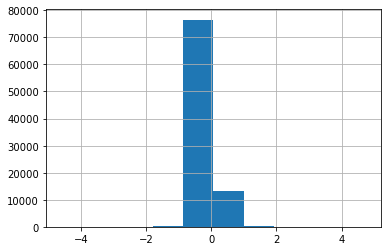

In [28]:
reduced_df.logerror.hist()

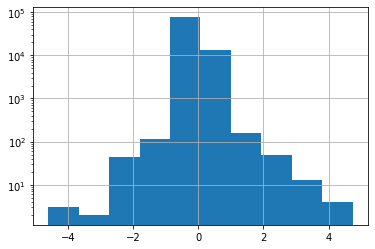

In [29]:
fig, ax = plt.subplots()
reduced_df.logerror.hist(ax = ax)
ax.set_yscale('log')